**Saksinkarn Petchkuljinda; 630510600**

## Idea of Polynomial Interpolation

Suppose we have $n+1$ datasets in the form of pairs $(x_0, y_0), ..., (x_n, y_n)$. We would like to find such the polynomial with minimum degree $p$ named $Q_p(x)$, such that:

$$Q_p(x_i) = y_i$$

For every $i\in\{0, ..., n\}$.

If $x_0, ..., x_n$ are distinct, then for any $f(x_0), ..., f(x_n)$ there **exists** a **unique** polynomial $Q_n(x)$ with sequence of coefficients $a_0, ..., a_n$ such that $Q_n(x_i) = y_i$ for all $i\in\{0, ..., n\}$, where:

$$
Q_n(x) = a_0+a_1x+a_2x^2+...+a_nx^n
$$

## Newton Polynomial

Instead of calculating proportion of significance for each points, like Lagrange polynomials, Newton polynomials are built in a bottom-up approach to interpolate point-by-point -- not all at once.

**Key Idea: Trying to fit polynomial $P(x)$ to point $(x_i, y_i)$, or $f(x) = y_i$ when $x=x_i$. If other points are added, $P(x)$ must fit those points as well without losing the fitness for point $(x_i, y_i)$**

Suppose we have the following points:

$$
\begin{align*}
p_0 &= (x_0, y_0) \\
p_1 &= (x_1, y_1) \\
& ... \\
p_{n-1} &= (x_{n-1}, y_{n-1})
\end{align*}
$$

And $P(x)$ is a Newton polynomial that fits those points. Let's first fit $P(x)$ to $p_0$, we get:

$$P_0(x) = y_0\ \ \ \ \text{___(1)}$$

Look simple! Here comes the hard part, how to fit $p_1$ while also maintain to fit $p_0$?

***The solution is,***  if $x\neq x_0$, $y_0$ from $\text{(1)}$ should be replace with $y_1$ instead. So it's like:

$$P_1(x) = y_0 \textcolor{red}{- y_0 + y_1}\ \ \ \ \text{___(2)}$$

But wait! It doesn't fit $p_0$ anymore! Maybe we should consider replace it **based on the value of $x$**. So we want a coefficient for that. When the coefficient is *0*, it is $x=x_0$, and *1* when $x=x_0$. Therefore:

$$P(x) = y_0 + (y_1-y_0)(x-x_0)\ \ \ \ \text{___(3)}$$

Substitute $x=x_0$, we get:

$$
\begin{align*}
P_1(x_0) &= y_0 + (y_1-y_0)(x_0-x_0)\\
&= y_0 + (y_1-y_0)(0)\\
P_1(x_0) &= y_0\ \ \ \ \text{___(4)}
\end{align*}
$$

But what if we substitute $x=x_1$?

$$
P_1(x_1) = y_0 + (y_1-y_0)(x_1-x_0)\neq y_1\ \ \ \ \text{___(5)}
$$

The problem here is the term $(x_1-x_0)$ on the numerator. We have to remove it so that there are only $y_0 + (y_1-y_0)$ to eventually become $y_1$. To remove that, let's add $(x_1-x_0)$ on the denominator.

$$
P_1(x) = y_0 + \frac{(y_1-y_0)}{(x_1-x_0)}(x-x_0)\ \ \ \ \text{___(6)}
$$

Let's substitute $x=x_0$ and $x=x_1$ to see what would happen?

$$
\begin{align*}
P_1(x_0) &= y_0 +  \frac{(y_1-y_0)}{(x_1-x_0)}(x_0-x_0)\\
&= y_0 + \cancel{\frac{(y_1-y_0)}{(x_1-x_0)}(0)}\\
P_1(x_0) &= y_0\ \ \ \ \text{___(7)}\\
P_1(x_1) &= y_0 +  \frac{(y_1-y_0)}{\cancel{(x_1-x_0)}}(x_1-x_0)\\
&= \cancel{y_0} + (y_1\cancel{-y_0})\\
P_1(x_1) &= y_1\ \ \ \ \text{___(8)}
\end{align*}
$$

**Therefore, to add more points, you have to create fractions that remove the older terms. Notice that:**

$$
P_1(x) = P_0(x) + \frac{(y_1-y_0)}{(x_1-x_0)}(x-x_0)\ \ \ \ \text{___(9)}
$$

Repeating this process until we reach $n$ points, we can interpolate the next $n+1$ point, like:

$$
\begin{align*}
P_n(x) = &P_0(x)\\
&+\frac{f(x_1)- P_0(x_1)}{(x_1-x_0)}(x-x_0) \\
&+ \frac{f(x_2) - P_1(x_2)}{(x_2-x_0)(x_2-x_1)}(x-x_0)(x-x_1) \\
&+ ... + \frac{f(x_n)-P_{n-1}(x_n)}{\prod^{n-1}_{j=0} (x_n - x_j)}\ \ \ \ \text{___(10)}
\end{align*}
$$

To simplify $\text{(10)}$, it is:

$$
\begin{align*}
P_n(x) &= a_0 + a_1(x-x_0) + ... + a_n (x-x_0)...(x-x_n)\\
P_n(x) &= a_0 + \sum^n_{j=1} a_j \prod^{j-1}_{k=0} (x-x_k)\ \ \ \ \text{___(11)}
\end{align*}
$$

where

$$
\begin{align*}
a_0 &= y_0\text{ or }f(x_0)\\
a_j &= \frac{f(x_j)-P_{j-1}(x_j)}{\prod^{j-1}_{k=0} (x_j-x_k)},\ \ \ \ 1\leq j \leq n\ \ \ \ \text{___(12)}
\end{align*}
$$

## Polynomial Implementation

There's actually a library called `Polynomials.jl`, but importing one here is messy. So let's stick to the same implementation from `interpolation-lagrange.ipynb`. You may run all and just scroll without reading them.

In [2]:
using Printf
using LaTeXStrings

Declare a class-like type for a polynomial.

In [3]:
Polynomial::Type{Dict{Int64, Float64}} = Dict{Int64, Float64}
# Dict of coefficient, followed by exponent

Dict{Int64, Float64}

Declare method-like functions for a polynomial.

In [4]:
function addToPolynomial!(
        poly::Polynomial,
        expo::Int64,
        coef::Float64,
    )::Nothing
    
    poly[expo] = get(poly, expo, 0.0) + coef
    
    # this code reduces calculation overhead from zero terms
    # iszero(x) is specifically made for floating-point numbers
    if iszero(poly[expo]) 
        delete!(poly, expo)
    end
    
    return nothing
end

addToPolynomial! (generic function with 1 method)

In [5]:
function addMultipleToPolynomial!(
        poly::Polynomial,
        monos::Union{Vector{Pair{Int64, Float64}}, Polynomial},
    )::Nothing
    for (expo, coef) in monos
        addToPolynomial!(poly, expo, coef)
    end
    return nothing
end

addMultipleToPolynomial! (generic function with 1 method)

In [6]:
function calcPoly(poly::Polynomial, x::Float64)::Float64
    ret::Float64 = 0.0
    for (expo, coef) in poly
        ret += coef * x ^ expo
    end
    return ret
end

calcPoly (generic function with 1 method)

In [7]:
function printRawPoly(poly::Polynomial)::String
    txt::String = ""
    for (i, expo) in enumerate(sort(collect(keys(poly)), rev=true))
        if i > 1 && poly[expo] >= 0
            txt = string(txt, "+")
        end
        txt = string(txt, "$(poly[expo])")
        if expo > 0
            txt = string(txt, "x")
        end
        if expo > 1
            txt = string(txt, "^$expo")
        end
    end
    return txt
end

printRawPoly (generic function with 1 method)

In [8]:
function printPoly(poly::Polynomial)::LaTeXString
    return LaTeXString("\$" * printRawPoly(poly) * "\$")
end

printPoly (generic function with 1 method)

In [9]:
# to pass a polynomial, use <poly> in the format string
function printFormattedPoly(
        txt::String,
        polies::Vararg{Polynomial},
    )::LaTeXString
    for poly in polies
        txt = replace(txt, "<poly>" => printRawPoly(poly), count=1)
    end
    return LaTeXString("\$" * txt * "\$")
end

printFormattedPoly (generic function with 1 method)

Test by building instances of the polynomial $P(x) = x^2 + 2x + 1$ in a variety of ways.

In [10]:
p1::Polynomial = Polynomial(Dict(2 => 1.0, 0 => 1.0, 1 => 2.0))
printFormattedPoly("p_1 = <poly>", p1)

L"$p_1 = 1.0x^2+2.0x+1.0$"

In [11]:
p2::Polynomial = Polynomial(Dict())
addToPolynomial!(p2, 2, 1.0)
addToPolynomial!(p2, 0, 1.0)
addToPolynomial!(p2, 1, 2.0)
printFormattedPoly("p_2 = <poly>", p2)

L"$p_2 = 1.0x^2+2.0x+1.0$"

In [12]:
p3::Polynomial = Polynomial(Dict())
addMultipleToPolynomial!(p3, [2 => 1.0, 0 => 1.0, 1 => 2.0])
printFormattedPoly("p_3 = <poly>", p3)

L"$p_3 = 1.0x^2+2.0x+1.0$"

In [13]:
LaTeXString("\$p_1(5) = $(calcPoly(p1, 5.0))\$")

L"$p_1(5) = 36.0$"

In [14]:
LaTeXString("\$p_2(5) = $(calcPoly(p2, 5.0))\$")

L"$p_2(5) = 36.0$"

In [15]:
LaTeXString("\$p_3(5) = $(calcPoly(p3, 5.0))\$")

L"$p_3(5) = 36.0$"

OK, it works! Now let's provide more operations over our Polynomial.

In [16]:
function polyPlus(p1::Polynomial, p2::Polynomial)::Polynomial
    ret::Polynomial = copy(p1)
    addMultipleToPolynomial!(ret, p2)
    
    return ret
end

function negPoly(poly::Polynomial)::Polynomial
    ret::Polynomial = copy(poly)
    for (expo, coef) in ret
        ret[expo] = -coef
    end
    
    return ret
end

function polyMinus(p1::Polynomial, p2::Polynomial)::Polynomial
    ret::Polynomial = copy(p1)
    neg_p2 = negPoly(p2)
    addMultipleToPolynomial!(ret, neg_p2)
    
    return ret
end

function polyMul(p1::Polynomial, p2::Polynomial)::Polynomial
    ret::Polynomial = Polynomial(Dict())
    for (expo1, coef1) in p1
        for (expo2, coef2) in p2
            addToPolynomial!(ret, expo1 + expo2, coef1 * coef2)
        end
    end
    
    return ret
end

polyMul (generic function with 1 method)

In [17]:
function mulConstToPoly(poly::Polynomial, c::Float64)::Polynomial
    # @printf("Before: ")
    # println(printPoly(poly))
    ret::Polynomial = copy(poly)
    for (expo, coef) in ret
        ret[expo] = c * coef
    end
    
    # @printf("After: ")
    # println(printPoly(ret))
    
    return ret
end

mulConstToPoly (generic function with 1 method)

Test

In [18]:
p1::Polynomial = Polynomial(Dict(2 => 1.0, 1 => -2.0, 0 => 1.0))
printFormattedPoly("p_1 = <poly>", p1)

L"$p_1 = 1.0x^2-2.0x+1.0$"

In [19]:
p2::Polynomial = Polynomial(Dict(1 => 1.0, 0 => -1.0))
printFormattedPoly("p_2 = <poly>", p2)

L"$p_2 = 1.0x-1.0$"

In [20]:
printFormattedPoly("p_1 + p_2 = <poly>", polyPlus(p1, p2))

L"$p_1 + p_2 = 1.0x^2-1.0x$"

In [21]:
printFormattedPoly("p_1 - p_2 = <poly>", polyMinus(p1, p2))

L"$p_1 - p_2 = 1.0x^2-3.0x+2.0$"

In [22]:
printFormattedPoly("p_1 \\cdot p_2 = <poly>", polyMul(p1, p2))

L"$p_1 \cdot p_2 = 1.0x^3-3.0x^2+3.0x-1.0$"

In [23]:
printFormattedPoly("c\\cdot p_1 = <poly>; c = 5", mulConstToPoly(p1, 5.0))

L"$c\cdot p_1 = 5.0x^2-10.0x+5.0; c = 5$"

## Implementation of Newton Polynomials

Define Newton Polynomial object.

In [24]:
struct NewtonInterpolator
    Xs::Set{Float64}  # to search if a new x-value exists
    data::Vector{Pair{Float64, Float64}}  # importantly: data must be ordered by appending time
    dataLen::Int64
    poly::Polynomial
end

**Without divided difference algorithm:**, we will try to interpolate by directly calculate them according to $\text{(12)}$.

In [25]:
# Define a custom exception in case a user input existing x-value
struct XValueExistsException <: Exception
    message::String
end

In [26]:
# A function to initialize a NewtonInterpolator instance.
function createNewton(x::Float64, y::Float64)::NewtonInterpolator
    return NewtonInterpolator(
        Set([x]),
        [x => y],
        1,
        Polynomial(Dict(0 => y)),
    )
end

createNewton (generic function with 1 method)

In [27]:
# A function to calculate the 'a' constant.
function calcA(
        interpolator::NewtonInterpolator,
        x::Float64,
        y::Float64,
    )::Float64
    
    # println("calcDividedDiff($(printRawPoly(interpolator.poly)), $x, $y)")
    
    denom::Float64 = 1.0
    for (xk, yk) in interpolator.data
        denom *= x - xk
    end
    
    ret::Float64 = (y - calcPoly(interpolator.poly, x)) / denom
    # println("calcDividedDiff returns $ret")
    
    return (y - calcPoly(interpolator.poly, x)) / denom
end

calcA (generic function with 1 method)

In [28]:
# Add one point to Newton Interpolator
function addPointToNewton(
        interpolator::NewtonInterpolator,
        x::Float64,
        y::Float64,
    )::NewtonInterpolator
    if x in interpolator.Xs
        throw(XValueExistsException("'$x' exists and already interpolated."))
    end
    
    # println("addPointToNewton($(printRawPoly(interpolator.poly)), $x, $y)")
    
    a::Float64 = calcA(interpolator, x, y)
    
    newPoly::Polynomial = Polynomial(Dict(0 => 1))
    for (xk, yk) in interpolator.data
        newPoly = polyMul(newPoly, Polynomial(Dict(1.0 => 1.0, 0.0 => -xk)))
    end
    newPoly = mulConstToPoly(newPoly, a)
    # println("newPoly=$(printRawPoly(newPoly))")
    newPoly = polyPlus(newPoly, interpolator.poly)
    
    newXs = copy(interpolator.Xs)
    push!(newXs, x)
    
    newData = copy(interpolator.data)
    push!(newData, x => y)
    
    newDataLen = interpolator.dataLen + 1
    
    # println("addPointToNewton returns $(printRawPoly(newPoly))")
    
    return NewtonInterpolator(newXs, newData, newDataLen, newPoly)
end

addPointToNewton (generic function with 1 method)

In [29]:
# Add multiple points to Newton Interpolator
function addDataToNewton(
        interpolator::NewtonInterpolator,
        data::Dict{Float64, Float64},
    )::NewtonInterpolator
    ret::NewtonInterpolator = interpolator
    for (x, y) in data
        # println("Dealing with x=$x, y=$y")
        ret = addPointToNewton(ret, x, y)
        # println("Got $(printRawPoly(ret.poly))")
    end
    
    return ret
end

addDataToNewton (generic function with 1 method)

In [30]:
# Create a NewtonInterpolator instance from multiple data
function createNewtonMultiple(data::Dict{Float64, Float64})::NewtonInterpolator
    ret = nothing
    for (i, (x, y)) in enumerate(data)
        # println("Dealing with x=$x, y=$y")
        if i == 1
            ret = createNewton(x, y)
        else
            ret = addPointToNewton(ret, x, y)
        end
        # println("Got $(printRawPoly(ret.poly))")
    end
    
    return ret
end

createNewtonMultiple (generic function with 1 method)

**Let's Test!**

Suppose we have the following data:

In [31]:
sample::Dict{Float64, Float64} = Dict(
    -1.0 => 9.0,
    0.0 => 5.0,
    1.0 => 3.0,
)

Dict{Float64, Float64} with 3 entries:
  0.0  => 5.0
  -1.0 => 9.0
  1.0  => 3.0

In [32]:
myNewton::Polynomial = createNewtonMultiple(sample).poly
# myNewton::Polynomial = Polynomial(Dict(1 => 3, 0 => 1.5))
# myNewton2::Polynomial = Polynomial(Dict(1 => 10.0/3.0, 0 => 1))
printFormattedPoly("\\mathrm{myNewton}=<poly>", myNewton)

L"$\mathrm{myNewton}=1.0x^2-3.0x+5.0$"

Test the output.

In [33]:
using Plots

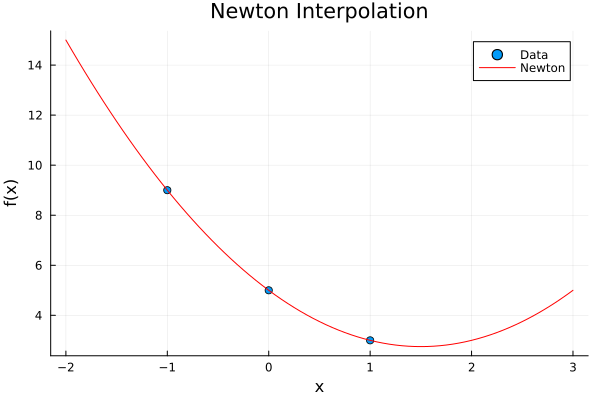

In [34]:
Xs = collect(keys(sample))
y = [sample[x] for x in Xs]

xhat = -2.0:0.0625:3.0
yhat = [calcPoly(myNewton, x) for x in xhat]

scatter(
    Xs,
    y,
    label="Data",
    xlabel="x",
    ylabel="f(x)",
    title="Newton Interpolation",
)
plot!(xhat, yhat, color="red", label="Newton")

As we know, Newton Polynomials are addictive. Therefore, it is a good idea if we compare them degree-by-degree.

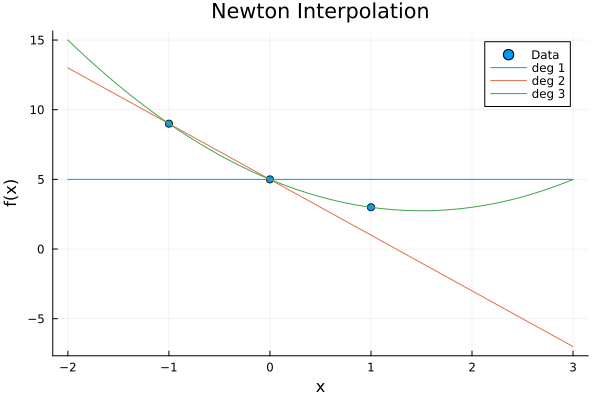

In [35]:
Xs = collect(keys(sample))
y = [sample[x] for x in Xs]

xhat = -2.0:0.0625:3.0

myNewton2 = createNewton(0.0, 5.0)
yhat1 = [calcPoly(myNewton2.poly, x) for x in xhat]
myNewton2 = addPointToNewton(myNewton2, -1.0, 9.0)
yhat2 = [calcPoly(myNewton2.poly, x) for x in xhat]
myNewton2 = addPointToNewton(myNewton2, 1.0, 3.0)
yhat3 = [calcPoly(myNewton2.poly, x) for x in xhat]

scatter(
    Xs,
    y,
    label="Data",
    xlabel="x",
    ylabel="f(x)",
    title="Newton Interpolation",
)
plot!(xhat, yhat1, color=1, label="deg 1")
plot!(xhat, yhat2, color=2, label="deg 2")
plot!(xhat, yhat3, color=3, label="deg 3")

## Compare to Lagrange Polynomials

Declare a function to build a Lagrange Polynomial.

In [36]:
function L(Xs::Vector{Float64}, j::Int64)::Polynomial
    xj::Float64 = Xs[j]
    ret::Polynomial = Polynomial(Dict(0 => 1.0))  # initial P(x) = 1x^0 = 1
    denom::Float64 = 1.0
    
    # println("Building L$j: x_%j = $xj")
    
    for (i, x) in enumerate(Xs)
        if i == j
            continue
        end
        
        current::Polynomial = Polynomial(Dict(1 => 1.0, 0 => -x))
        ret = polyMul(ret, current)
        denom::Float64 *= xj - x
    end
    
    ret = mulConstToPoly(ret, 1.0/denom)
    # println(printPoly(ret))
    return ret
end

L (generic function with 1 method)

In [37]:
function buildLagrange(data::Dict{Float64, Float64})::Polynomial  # takes pairs of (x, y) where x must be distinct
    Xs::Vector{Float64} = sort(collect(keys(data)))
    ret::Polynomial = Polynomial(Dict())
    for (i, x) in enumerate(Xs)
        l::Polynomial = L(Xs, i)
        term::Polynomial = mulConstToPoly(l, data[x])
        # println("data[$x] = $(data[x])")
        # println("multiplied term: $(printPoly(term))")
        ret = polyPlus(ret, term)
    end
    
    return ret
end

buildLagrange (generic function with 1 method)

Then we build a Lagrange polynomial named `myLagrange`.

In [38]:
myLagrange::Polynomial = buildLagrange(sample)
printFormattedPoly("\\mathrm{myLagrange}=<poly>", myLagrange)

L"$\mathrm{myLagrange}=1.0x^2-3.0x+5.0$"

Let's test the how it works.

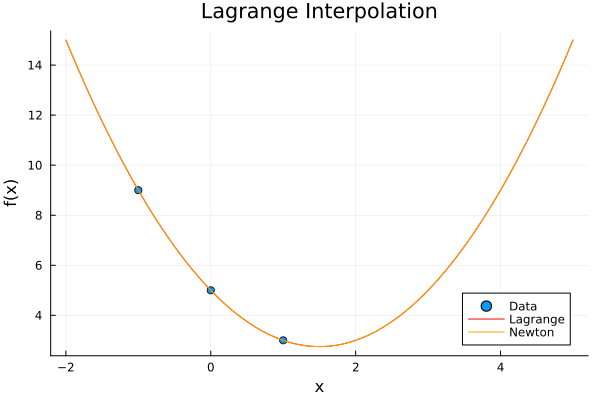

In [39]:
Xs = collect(keys(sample))
y = [sample[x] for x in Xs]

xhat = -2.0:0.0625:5.0
y_lag = [calcPoly(myLagrange, x) for x in xhat]
y_newt = [calcPoly(myNewton, x) for x in xhat]

scatter(
    Xs,
    y,
    label="Data",
    xlabel="x",
    ylabel="f(x)",
    title="Lagrange Interpolation",
)
plot!(xhat, y_lag, color="red", label="Lagrange")
plot!(xhat, y_newt, color="orange", label="Newton")

They are nearly the same, though the polynomials' terms are different.

## Test on complex data

We will try to interpolate $f(x) = \mathrm{sin}(x\cdot \mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(\mathrm{sin}(x)))))))))$ to see what would happen.

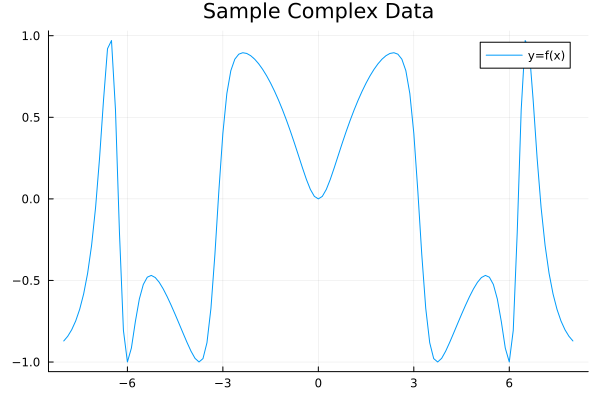

In [40]:
Xs = -8.0:0.125:8.0
f = x -> sin(x * sin(sin(sin(sin(sin(sin(sin(sin(x)))))))))
Yreal = [f(x) for x in Xs]

plot(Xs, Yreal, title="Sample Complex Data", label="y=f(x)")

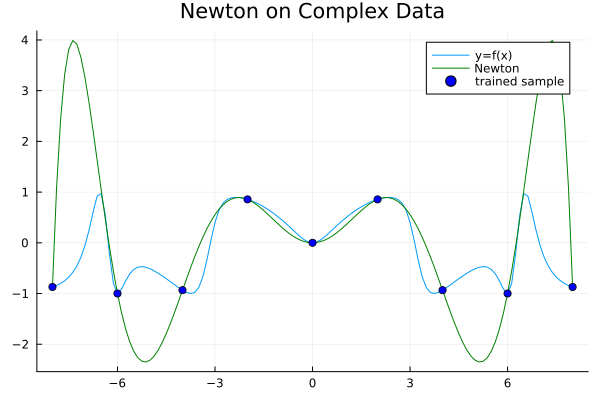

In [41]:
Xlag = -8.0:2:8.0
newton = createNewtonMultiple(Dict(x => f(x) for x in Xlag)).poly

Ylag = [calcPoly(newton, x) for x in Xs]

plot(Xs, Yreal, title="Newton on Complex Data", label="y=f(x)")
plot!(Xs, Ylag, color="green", label="Newton")
scatter!(Xlag, [f(x) for x in Xlag], color="blue", label="trained sample")

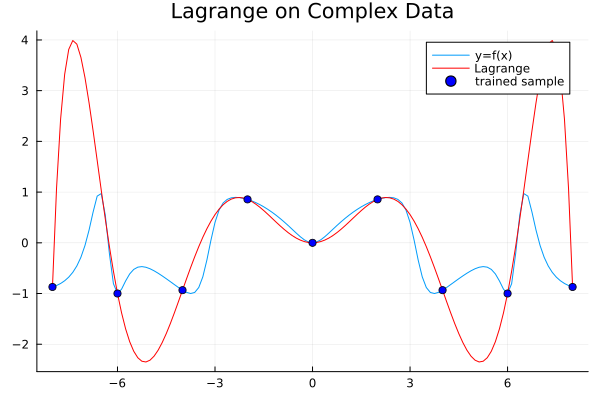

In [42]:
Xlag = -8.0:2.0:8.0
lagrange = buildLagrange(Dict(x => f(x) for x in Xlag))

Ylag = [calcPoly(lagrange, x) for x in Xs]

plot(Xs, Yreal, title="Lagrange on Complex Data", label="y=f(x)")
plot!(Xs, Ylag, color="red", label="Lagrange")
scatter!(Xlag, [f(x) for x in Xlag], color="blue", label="trained sample")

Both look somewhat identical! Let's test on bigger data.

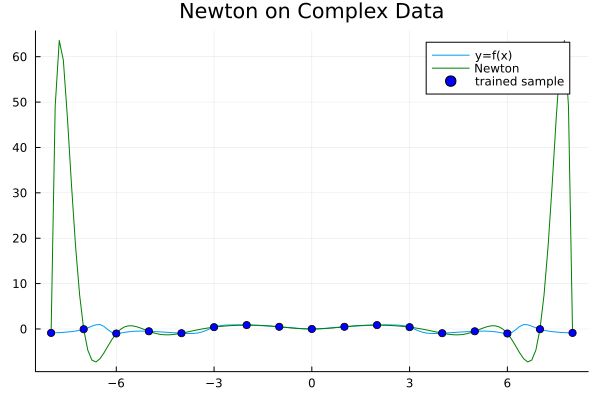

In [43]:
Xlag = -8.0:1.0:8.0
newton = createNewtonMultiple(Dict(x => f(x) for x in Xlag)).poly

Ylag = [calcPoly(newton, x) for x in Xs]

plot(Xs, Yreal, title="Newton on Complex Data", label="y=f(x)")
plot!(Xs, Ylag, color="green", label="Newton")
scatter!(Xlag, [f(x) for x in Xlag], color="blue", label="trained sample")

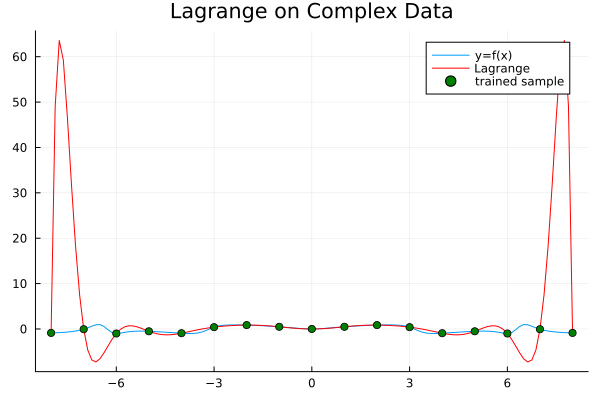

In [44]:
Xlag = -8.0:1.0:8.0
lagrange = buildLagrange(Dict(x => f(x) for x in Xlag))

Ylag = [calcPoly(lagrange, x) for x in Xs]

plot(Xs, Yreal, title="Lagrange on Complex Data", label="y=f(x)")
plot!(Xs, Ylag, color="red", label="Lagrange")
scatter!(Xlag, [f(x) for x in Xlag], color="green", label="trained sample")

**Both are nearly identical, but still bad when there are many data points.**